# Preprocessing and feature extraction 

This module starts actual machine learning part, by introducing some important concepts and walking through and example using classical statistics. Machine learning is more than statistics, but the covered statistical concepts are very important throughout the course.

## Machine Learning


![machine_learning.svg](kuvat/machine_learning.svg)




## Feature extraction

![featureextraction_p.svg](kuvat/featureextraction_p.svg)

* The purpose of feature extraction is to capture relevant properties of the samples into variables.
* Feature extraction requires domain knowledge and needs to be rethought for every project. It is therefore one of the most time consuming parts of machine learning processes.

## The purpose of machine learning
Task is to find a function $f$, which predicts variable $y_i$ based on $p$ features $x_{i,j}$, where $i \in [0,N]$ and $j \in [0,P]$.

$$
   \begin{bmatrix}
   y_1 \\
   y_2 \\
   \vdots \\
   y_n
   \end{bmatrix}
   = f 
   \left( \begin{bmatrix}
     x_{11} & x_{12} & x_{13} & \dots  & x_{1p} \\
     x_{21} & x_{22} & x_{23} & \dots  & x_{2p} \\
     \vdots & \vdots & \vdots & \ddots & \vdots \\
     x_{n1} & x_{n2} & x_{n3} & \dots  & x_{np}
   \end{bmatrix} \right)
$$



# Case one, sound recognition
![featureextraction_p.svg](kuvat/timedomainaudio.png)

This sound sample contains noise from wind turbine, by-passing cars and some birds perhaps.

Can you find good features to find out what is the dominating noise source in which time?


## Perhaps there are differences in the sound pressure level (volume)

![SPL of the audio](kuvat/splaudio.png)

This picture shows the [A-weighted](https://en.wikipedia.org/wiki/A-weighting) sound pressure level (SPL) of the sound signal. It shows what is the subjective volume perceived by a human observer. SPL is a RMS average of the signal over certain time period

$$L_p = 20 \log_{10}\left( \frac{p_{rms}}{p_0}\right) \qquad p_{rms} = \sqrt{\frac{1}{T} \int_0^T p(t)^2 dt}$$


where $p_{rms}$ is the RMS average of the sound pressure, $p_0=20~\mu$P, is the reference sound pressure and ,$T=1$ s, is a time constant.Notice that $L_p$ is shown in logarithmic scale. Log transformation may sometimes be helpful.


## Perhaps studying different spectral components help

![Sectrogram of the audio](kuvat/sgramaudio.png)

This figure is obtained by splitting the signal in 1 second pieces and applying a Fourier transformation to them, and then by plotting the spectrum of each slice vertically. This method is called as Short Time Fourier Transformation (STFT) and is often usefull method for extracting features from the data.

## Other audio features
Take a look at the feature extraction documentation of the [LibRosa library](https://librosa.org/doc/latest/feature.html).


# Case 2, What features could be used to classify Iris species?
| Setosa | Versicolor | Virginica |
| -------| ---------- |-----------|
| ![Setosa](kuvat/I-setosa-var-arctica.jpg "Setosa") | ![Versicolor](kuvat/Iris_versicolor_3.png "Versicolor") | ![Virginica](kuvat/1200px-Iris_virginica.jpg "Virginica") |
<span id="kuvaviite">Wikimedia Commons</span>


## Features measured by Fisher

One of the most famos data sets of statistics is the Iris-dataset by Fisher. Let's take a look what features he measured and how do they perform. 

Lets read the data set and plot the head of it.

In [8]:
import numpy as np
import seaborn as sns   
sns.set(style='ticks')  
iris = sns.load_dataset('iris')   
print(iris.shape)
print(iris.describe())
iris

(150, 5)
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## Seaborn

The Seaborn library is another library for plotting data, in addition to Matplotlib which we used earlier. Seaborn is especially good for statistical plots, mut it has unfortunately totally different API than matplotlib. It may be good to use Matplotlib usually, but it you find some plots inconvenient to be plotted with matplotlib, then it is time to check what seaborn can offer. Easiest way is to check the [example gallery](https://python-graph-gallery.com/all-charts/) to see if someone has made a similar plot what you need, and copy and modify the source code, which is given in the gallery.

Study the pairplots below, and consider following questions:

1. Can you separate the three species with only one feature? Can you separate one species with one feature?
1. Can you separate all three species by combining two features?
1. Which of the features has the biggest discriminative power (which can separate the different species most efficienty)?

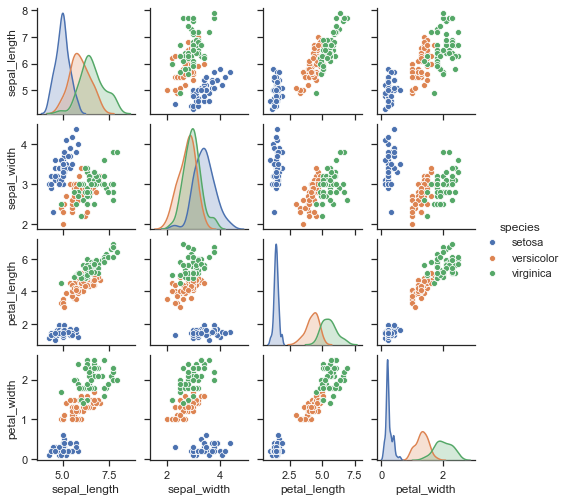

In [29]:
sns.pairplot(iris, hue="species", diag_kind='kde', height=1.7);


We could have used also a scatter matrix from Pandas, but is not as nice.

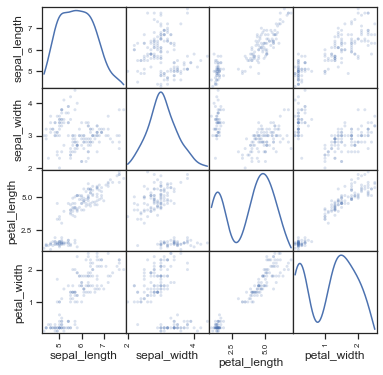

In [3]:
from pandas.plotting import scatter_matrix
scatter_matrix(iris, alpha=0.2, figsize=(6, 6), diagonal='kde');


## Quantitative analysis

It looks like petal_length can nicely separate Setosa's from other species, but not necessary Versicolor from Virginica. Lets try to get some numerical proof if this observation is correct.

Lets first study the average feature values and their deviations separately in each group. The groupby() function in pandas dataframe provides very handy methods for implementing this. Groupby kind of splits the original dataframe into three different dataframes according to the species class. 

Mean()-function calculates the columnwise mean so in this case it calculates the mean of each feature. Because the dataframe is splitted by species, the result is a matrix, in which each species are in rows, and features in columns. The feature 'species', which was used for grouping is removed from the result matrix.

In [5]:
iris.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


The mean values are different, but are the differences significant. Perhaps studying the overall variation or noise by means of standard deviation would help.

In [6]:
iris.groupby('species').std()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,0.352490,0.379064,0.173664,0.105386
versicolor,0.516171,0.313798,0.469911,0.197753
virginica,0.635880,0.322497,0.551895,0.274650


It looks like the differences of for example petal_lengths seem to be bigger than the standard deviation. It could be feasible to use it for species recognition.

### Visual analysis of mean and distribution using boxplot

The boxplot displays the median value (the red lines inside the boxes) and distribution as quartiles (the height of the boxes, and lengths of the whiskers) graphically. The box extends from *quartile* Q1 below to quartile Q3 above the median. The length of the whiskers is 1.5 times the *inter quartile range* (IQR) from the box edge, where IQR=Q3-Q1. The values outside of whiskers are interpreted as *outliers*, and they are plotted as circles.

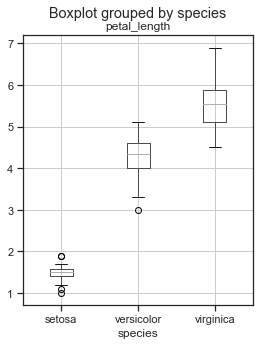

In [11]:
iris.boxplot('petal_length', by='species', figsize=(4,5));

The boxplot shows that Setosa can be separated from Versicolor and Virginica with no confusion, but there is some overlap between Versicolor and Virginica.

### Applying an external function to data

Sometimes it is necessary to apply also such functions to the data, which are not part of the dataframe. It can be accomplished by using the apply-method as follows. Here the median-function from the NumPy-libary is used. You can also apply your own function to the data.

In [12]:
iris.groupby('species').petal_length.apply(np.median)

species
setosa        1.50
versicolor    4.35
virginica     5.55
Name: petal_length, dtype: float64

In [16]:
x=np.array((1,5,3,6,8,4,3,6,2))
np.sort(x)
x

array([1, 5, 3, 6, 8, 4, 3, 6, 2])

In [18]:
def fullRange(x):
    """A function for studying the full range of the vector"""
    sortedx=np.sort(x)
    return (sortedx[-1] - sortedx[0])

iris.groupby('species').petal_length.apply(fullRange)

species
setosa        0.9
versicolor    2.1
virginica     2.4
Name: petal_length, dtype: float64

## Hypothesis testing

Let's formally study if the petal lengts are significantly different or not by forming two hypothesis:

1. The distribution of petal lengths of Setosa species is different than the distribution of petal lengts of other species
1. Let's also assume that the distribution of petal lengts of Versicolor is siginificantly different than that of Virginica

The standard test for these hypothesis is the [Student's T-test](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/t-test/). 

But the T-test can only be used if the variables are normally distributed. Let's test that first.

### Testing if distribution of the variables is normal

Read more about normality testing methods from [Statistics howto](https://www.statisticshowto.datasciencecentral.com/assumption-of-normality-test/)

Most often used normality test is the D’Agostino-Pearson Test. It can be taken into use by importing the `normaltest` function from the stats module of the Scientific Python package.



In [19]:
from scipy.stats import normaltest

normaltest

# Run normality test, and print the output
print(normaltest(iris.petal_length))

# Interpretation, we discard the hypothesis of normal distribution
# if it's probability (the p-value) is less than 95%
alpha=0.05
statistis, pvalue=normaltest(iris.petal_length)
if pvalue<alpha:
    print("Data is normal distributed")
else:
    print("Data is not normal distributed")

NormaltestResult(statistic=221.68729405585384, pvalue=7.264667501338673e-49)
Data is normal distributed


But we were supposed to test this for all species separately

In [48]:
# 
# It can be done by grouping the data by species, selecting the petal_lenght
# and applying the normal test to all species separately
results=iris.groupby('species').petal_length.apply(normaltest)
print(results)
if (results[0][1] < alpha):     print("Petal length of Setosa is normally distributed")
if (results[1][1] < alpha):     print("Petal length of Versicolor is normally distributed")
if (results[2][1] < alpha):     print("Petal length of Virginica is normally distributed")

species
setosa        (2.236973547672174, 0.32677390349997293)
versicolor     (3.3182862415011867, 0.190301976072032)
virginica     (2.6991800572037943, 0.2593465635270746)
Name: petal_length, dtype: object


The data does not justify us to safely conclude that the data would be normally distributed! The visual inspection of the distribution shown in the Seaborn pairplot support this result.

## Test the similarity of petal_length distributions

The most often used method for hypothesis testing, is the Student's T-test, which is also in the stats module of Scientific Python package.

(*We try to use T-test even though we do not have the autorization, because the variable is not normally distributed! The consequence is that whatever the result is, it may not be reliable*)

T-Test supports four different confiurations. Read the documentation and select the correct configuration. The selection is quite straightforward.

1. Two-sided test for the null hypothesis that two independent samples have identical average (expected) values. Example: `p=ttest_ind(a,b)`
1. Two-sided test for the null hypothesis that the expected value of a sample of independent observations `a` is equal to the given population mean, `popmean`. Example: `p=ttest_1samp(a, popmean)`
1. Two-sided test for the null hypothesis that two related or repeated or paired samples have identical average (expected) values. Example: `p=ttest_rel(a,b)`
1. Two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values. Example: `ttest_ind_from_stats(mean1, std1, n1, mean2, std2, n2)`

Here all tests are two sided, meaning that we do not have any a-priori knowlwdge that one would be bigger than another.

The hypotheses that the two distributions are different are accepted if the probability of getting into that conclusion by chance, $\alpha$ is smaller than 5%: 

(p-value$~<\alpha$, when $\alpha=0.05$).

In [20]:
# T-test of two independent data sets
from scipy.stats import ttest_ind 

alpha=0.05

# Test if the petal_lengths of the Setosas are different than the petal_lengths other flowers
test=ttest_ind(iris[iris.species=='setosa'].petal_length, iris[iris.species!='setosa'].petal_length)
if test.pvalue < alpha:
    print("The petal_length of setosa are statistically different "
          +"than the petal_length of other flowers. p=%4.3f" % test.pvalue)
else:
    print("The petal_length of setosa are not statistically different "
          +"than the petal_length of other flowers: p=%4.3f" % test.pvalue)
    
# Test if the petal_lengths of Versicolor and Virginia are different
test=ttest_ind(iris[iris.species=='versicolor'].petal_length, iris[iris.species=='virginica'].petal_length)
if test.pvalue < alpha:
    print("The petal_lengths of Versicolor and Virginica are statistically different "
          +": p=%4.2f" % test.pvalue)
else:
    print("The petal_lengths of Versicolor and Virginica are not statistically different "
          +": p=%4.2f" % test.pvalue)

The petal_length of setosa are statistically different than the petal_length of other flowers. p=0.000
The petal_lengths of Versicolor and Virginica are statistically different : p=0.00


## Non-parametric testing
Because the data is not normally distributed, we are not allowed to use the T-test, but we need to use non-parametric tests instead. One often used is the [Mann-Whitney rank-test](https://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U_test). Because this test does not assume anything about the shape of the distributions, it usually needs larger sample size to get reliable estimate of p-values. Sample size bigger than 20 for both classes is recommended.

In [55]:
from scipy.stats import mannwhitneyu
print(mannwhitneyu(iris[iris.species=='versicolor'].petal_length, iris[iris.species=='virginica'].petal_length))

MannwhitneyuResult(statistic=44.5, pvalue=4.5667723638341282e-17)


The p-value of $4.56 \cdot 10^{-17} < \alpha$ we can conclude that the difference of the petal lenghts of versicolor and virginica is statistically significant. This is reliable result, since it was not necessary to assume any specifig distribution of feature variables.

## What was learned?

- Some mesured values (petal and sepal widhts and heights in this case) can be used as features, describing the similarities and differences of the samples
- T-test can be used for testing if the values of the features are the same or different for different classes of samples. If the features are not significantly different, they are not usefull for classification.
- T-test can only be used if the variables are normally distributed. 
- Non-parametric tests can be used if the data is not normally distributed, but it may need larger sample size

Now we can be certain, that the petal lengts are different in all species, and the difference is statistically significant, meaning that they are not different only by chance.

# Using features for recognizing species

Now that we know that petal_lengths are different for each species, can this feature be used in recognizing flowers or classifying flower species?

The following picture shows the position of decision boundary leading to highest precision in classifying Versicolor from Virginica species based on petal length. 
- Blue curve shows the distribution of petal lengths for Versicolor and red curve the distribution for Virginica
- The decision boundary is in the location of the intersection of the distribution curves
- ROC-curve is shown on the right hand side.
  - The red dot shows the point corresponding to the current decision boundary
  - From the curve it can be read that current decisiong point includes 90% of Versicolors, but it also includes some 12% percent of Virginicas
  - The sensitivity of the classifier is therefore 90% and specificity is 88%

![ROC analyzer](kuvat/rocanalyzer.png)


The ROC curve can be created using following code. Read more from [Understanding ROC curves](https://stackabuse.com/understanding-roc-curves-with-python/)

In [24]:
from scipy.stats import gaussian_kde
import numpy as np
import matplotlib.pyplot as plt

def plotROC(a,b, color='r'):
    """ Plots a ROC curve of the one dimensional data whose values  
        in one case are listed in a, and in another case in b.
    """
    ## Create a new x-axis, which has for example 100 poinsts
    N=100
    smallest_value=np.min((a.min(), b.min()))
    biggest_value=np.max((a.max(), b.max()))
    x_axis=np.linspace(smallest_value, biggest_value, N)

    ## Estimate the distribution of X using kernel density estimate
    ## For both cases, 0 and 1 and evaluate their values in the x-axis
    ## This can be called also as probability density function (PDF).
    h0=gaussian_kde(a).evaluate(x_axis)
    h1=gaussian_kde(b).evaluate(x_axis)
    
    ## Calculate the cumulative distribution function from PDF:s above
    ## and scale them between 0 and 1
    rocx=np.cumsum(h0)/np.sum(h0)
    rocy=np.cumsum(h1)/np.sum(h1)
    
    plt.plot(1-rocx, 1-rocy, c=color)
    plt.xlabel('1-Specificity')
    plt.ylabel('Sensitivity')
    

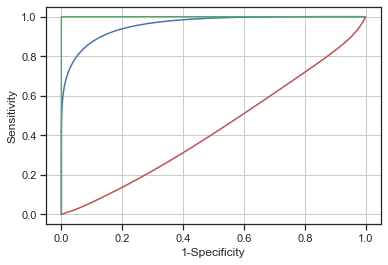

In [28]:
# Can petal length feature be used to distinguish versicolor (see the blue curve)
plotROC(iris[iris.species=='versicolor'].petal_length, iris[iris.species=='virginica'].petal_length, color='b')

# Can pedal length separate setosa from all other species (see the green curve)
plotROC(iris[iris.species=='setosa'].petal_length, iris[iris.species!='setosa'].petal_length, color='g')

# Is sepal width usefull in separating virginica from setosa (red curve)
plotROC(iris[iris.species=='virginica'].sepal_width, iris[iris.species!='setosa'].sepal_width, color='r')

plt.grid()
    